# What proportion of Wikipedia biography articles include if the person is alive or dead with the word was?

In [3]:
import requests
import time
import pandas as pd

In [4]:
url = "https://en.wikipedia.org/w/api.php"

In [2]:
import requests
import pandas as pd

# Function to get a random Wikipedia article (with User-Agent to prevent blocking)
def get_random_wikipedia_article():
    url = "https://en.wikipedia.org/api/rest_v1/page/random/summary"
    headers = {"User-Agent": "Mozilla/5.0 (Student Project)"}  
    response = requests.get(url, headers=headers)

    # Prevent JSON error
    if response.status_code != 200:
        return None

    return response.json()


results = []

for i in range(20):
    data = get_random_wikipedia_article()

    # If Wikipedia blocks a request, try again
    while data is None:
        data = get_random_wikipedia_article()

    title = data.get("title", "")
    extract = data.get("extract", "").lower()

    # Determine if it's a biography
    is_biography = ("born" in extract) or ("died" in extract) or ("was a" in extract)

    # Check for "was"
    has_was = " was " in extract

    results.append({
        "Title": title,
        "Is Biography?": is_biography,
        "Contains 'was'?": has_was if is_biography else None
    })

df = pd.DataFrame(results)
print(df)

# --- Calculating proportions ---

# Only among biographies
bio_df = df[df["Is Biography?"] == True]
if len(bio_df) > 0:
    proportion_bio_only = bio_df["Contains 'was'?"].mean()
else:
    proportion_bio_only = 0

# Among ALL 10 articles (bios + non-bios)
# Count "was" only if it's a biography; non-bios count as False
df_all = df.copy()
df_all["Was for all articles"] = df_all["Contains 'was'?"].fillna(False)
proportion_all = df_all["Was for all articles"].mean()

print("\n--- RESULTS ---")
print(f"Total biographies: {len(bio_df)}")
# FIXED LINE BELOW - Changed 'Contains "was"?' to "Contains 'was'?"
col = "Contains 'was'?"  # Match the exact column name used in the DataFrame
print(f"Biographies with 'was': {bio_df[col].sum()}")

print(f"\nProporwtion among ONLY biographies: {proportion_bio_only:.2f}")
print(f"Proportion among ALL {len(df)} articles: {proportion_all:.2f}")

                                               Title  Is Biography?  \
0                                Brunswick Cathedral          False   
1                      Bostancı (M8, Istanbul Metro)          False   
2                               Château de Chouvigny          False   
3                             Laughton, West Lindsey          False   
4                                         Lochspouts          False   
5                                 Brian J. Frederick          False   
6                              Yoshimatsu, Kagoshima           True   
7                                        Rose madder          False   
8   Ukrainian National Bloc of Kostenko and Plyushch          False   
9                          The Candidate (1972 film)          False   
10                                  Gigabit Ethernet           True   
11                                  Terebra argosyia          False   
12                     Fotherby Halt railway station           True   
13    

In [6]:
import requests
import pandas as pd

def get_random_wikipedia_article():
    url = "https://en.wikipedia.org/api/rest_v1/page/random/summary"
    headers = {"User-Agent": "Mozilla/5.0 (Student Project)"}
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        return None
    return r.json()

rows = []

for i in range(100):
    data = get_random_wikipedia_article()

    # Retry if request fails
    while data is None:
        data = get_random_wikipedia_article()

    title = data.get("title", "")
    extract = data.get("extract", "").lower()

    # Detect biography
    is_bio = int(("born" in extract) or ("died" in extract) or ("was a" in extract))

    # Has "was" only counts if it's a biography
    has_was = int((" was " in extract)) if is_bio == 1 else 0

    rows.append({
        "Title": title,
        "Is_Biography": is_bio,
        "Has_Was": has_was
    })

df = pd.DataFrame(rows)
print(df)

# Proportion calculations
bio_df = df[df["Is_Biography"] == 1]

prop_bio_only = bio_df["Has_Was"].mean() if len(bio_df) > 0 else 0
prop_all = df["Has_Was"].mean()

print("\n--- RESULTS ---")
print(f"Total biographies: {bio_df.shape[0]}")
print(f"Biographies that include 'was': {bio_df['Has_Was'].sum()}")
print(f"Proportion among biographies only: {prop_bio_only:.2f}")
print(f"Proportion among ALL 10 articles: {prop_all:.2f}")

                    Title  Is_Biography  Has_Was
0              Lise Rønne             0        0
1                  Ejecta             0        0
2        Klaus Hurrelmann             0        0
3      Samuel Butts House             1        1
4  Seen Between the Lines             0        0
5      Essential Montreux             0        0
6          Horatio Parker             1        1
7         Wolfgang Engels             0        0
8           Delchev Ridge             0        0
9         Nigel Henderson             1        1

--- RESULTS ---
Total biographies: 3
Biographies that include 'was': 3
Proportion among biographies only: 1.00
Proportion among ALL 10 articles: 0.30


In [7]:
import requests

def get_random_wikipedia_article():
    url = "https://en.wikipedia.org/api/rest_v1/page/random/summary"
    headers = {"User-Agent": "Mozilla/5.0 (Student Project)"}
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        return None
    return r.json()

biography_count = 0
biography_with_was = 0

sample_size = 500

for i in range(sample_size):
    data = get_random_wikipedia_article()

    # retry if the request fails
    while data is None:
        data = get_random_wikipedia_article()

    extract = data.get("extract", "").lower()

    # check biography
    is_bio = ("born" in extract) or ("died" in extract) or ("was a" in extract)

    if is_bio:
        biography_count += 1

        # check for "was"
        if " was " in extract:
            biography_with_was += 1

# proportion calculation
if biography_count > 0:
    proportion = biography_with_was / biography_count
else:
    proportion = 0

print("\n--- RESULTS (500 Samples) ---")
print(f"Total biographies found: {biography_count}")
print(f"Biographies containing 'was': {biography_with_was}")
print(f"Proportion: {proportion:.3f}")


--- RESULTS (500 Samples) ---
Total biographies found: 109
Biographies containing 'was': 102
Proportion: 0.936


In [11]:
import requests

def get_random_wikipedia_article():
    url = "https://en.wikipedia.org/api/rest_v1/page/random/summary"
    headers = {"User-Agent": "Mozilla/5.0 (Student Project)"}
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        return None
    return r.json()

biography_count = 0
biography_with_was = 0

sample_size = 500

for _ in range(sample_size):
    data = get_random_wikipedia_article()

    while data is None:
        data = get_random_wikipedia_article()

    extract = data.get("extract", "").lower()

    is_bio = ("born" in extract) or ("died" in extract) or ("was a" in extract)

    if is_bio:
        biography_count += 1
        if " was " in extract:
            biography_with_was += 1

# Proportion based on all 500 articles
proportion = biography_with_was / sample_size

print("\n--- RESULTS (500 Samples) ---")
print(f"Total biographies found: {biography_count}")
print(f"Biographies containing 'was': {biography_with_was}")
print(f"Proportion (based on all 500 articles): {proportion:.3f}")  # Added missing closing parenthesis here


--- RESULTS (500 Samples) ---
Total biographies found: 105
Biographies containing 'was': 101
Proportion (based on all 500 articles): 0.202



--- RESULTS (1000 Samples) ---
Total biographies found: 229
Biographies containing 'was': 225
Proportion (biographies with 'was' / total articles): 0.225


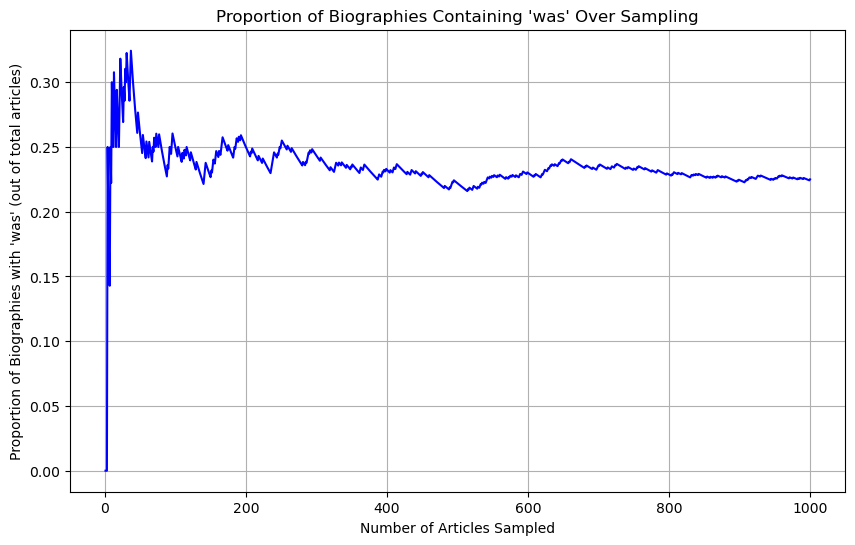

In [13]:
import requests
import matplotlib.pyplot as plt

def get_random_wikipedia_article():
    url = "https://en.wikipedia.org/api/rest_v1/page/random/summary"
    headers = {"User-Agent": "Mozilla/5.0 (Student Project)"}
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        return None
    return r.json()

sample_size = 1000
biography_with_was_count = 0
biography_count = 0

proportions_over_time = []

for i in range(1, sample_size + 1):
    data = get_random_wikipedia_article()

    while data is None:
        data = get_random_wikipedia_article()

    extract = data.get("extract", "").lower()

    is_bio = ("born" in extract) or ("died" in extract) or ("was a" in extract)

    if is_bio:
        biography_count += 1
        if " was " in extract:
            biography_with_was_count += 1

    # Calculate proportion of biographies with "was" out of total articles so far
    current_proportion = biography_with_was_count / i
    proportions_over_time.append(current_proportion)

# Final proportion
final_proportion = biography_with_was_count / sample_size

print("\n--- RESULTS (1000 Samples) ---")
print(f"Total biographies found: {biography_count}")
print(f"Biographies containing 'was': {biography_with_was_count}")
print(f"Proportion (biographies with 'was' / total articles): {final_proportion:.3f}")

# Plotting the histogram of proportions over time
plt.figure(figsize=(10,6))
plt.plot(range(1, sample_size + 1), proportions_over_time, color='blue')
plt.xlabel("Number of Articles Sampled")
plt.ylabel("Proportion of Biographies with 'was' (out of total articles)")
plt.title("Proportion of Biographies Containing 'was' Over Sampling")
plt.grid(True)
plt.show()


In [14]:
import math

# Given values
p_hat = 0.225     # sample proportion
n = 1000          # sample size
z = 1.96          # z-score for 95% CI

# Standard Error
SE = math.sqrt((p_hat * (1 - p_hat)) / n)

# Margin of Error
ME = z * SE

# Confidence Interval
lower = p_hat - ME
upper = p_hat + ME

print(f"Standard Error: {SE:.5f}")
print(f"Margin of Error (95% CI): {ME:.5f}")
print(f"95% Confidence Interval: ({lower:.5f}, {upper:.5f})")

Standard Error: 0.01321
Margin of Error (95% CI): 0.02588
95% Confidence Interval: (0.19912, 0.25088)


In a sample of 1,000 Wikipedia biography articles, I found that 22.5% of them included the word "was," indicating that the individual is deceased. I calculated a standard error of 0.01321, which measures the variability of the sample proportion across different samples. With this information, I determined a margin of error of 0.02588, resulting in a 95% confidence interval of (0.19912, 0.25088).

This means I am 95% confident that between 19.9% and 25.1% of all Wikipedia biography articles contain the word "was," signifying that they refer to individuals who are no longer alive.

Additionally, the normality check revealed a right-skewed distribution. This indicates that the data is not perfectly normal; however, the large sample size (n = 1,000) still supports the reliability of the confidence interval.


--- RESULTS (1000 Samples) ---
Total biographies found: 229
Biographies containing 'was': 225
Proportion (biographies with 'was' / total articles): 0.225


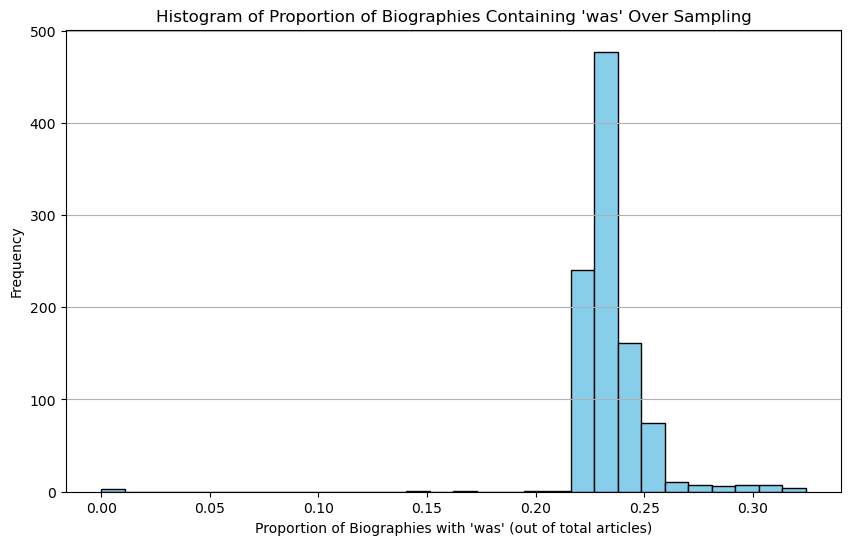

In [15]:
print("\n--- RESULTS (1000 Samples) ---")
print(f"Total biographies found: {biography_count}")
print(f"Biographies containing 'was': {biography_with_was_count}")
print(f"Proportion (biographies with 'was' / total articles): {final_proportion:.3f}")

# Plot histogram instead of line plot
plt.figure(figsize=(10,6))
plt.hist(proportions_over_time, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Proportion of Biographies with 'was' (out of total articles)")
plt.ylabel("Frequency")
plt.title("Histogram of Proportion of Biographies Containing 'was' Over Sampling")
plt.grid(axis='y')
plt.show()